## Basic Packages

In [1]:
# Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set_palette("pastel")

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
from imblearn.combine import SMOTEENN

In [4]:
data = pd.read_csv('Fraud.csv')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.shape

(6362620, 11)

# Project

## EDA

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
avg_data = pd.DataFrame(data.groupby(['step','type']).amount.mean()).reset_index()

In [9]:
avg_data


,step,type,amount
0,1,CASH_IN,1.622406e+05
1,1,CASH_OUT,1.717262e+05
2,1,DEBIT,4.484002e+03
3,1,PAYMENT,6.090297e+03
4,1,TRANSFER,4.503528e+05
...,...,...,...
2724,741,TRANSFER,4.250161e+06
2725,742,CASH_OUT,1.023124e+06
2726,742,TRANSFER,1.023124e+06
2727,743,CASH_OUT,2.189978e+06


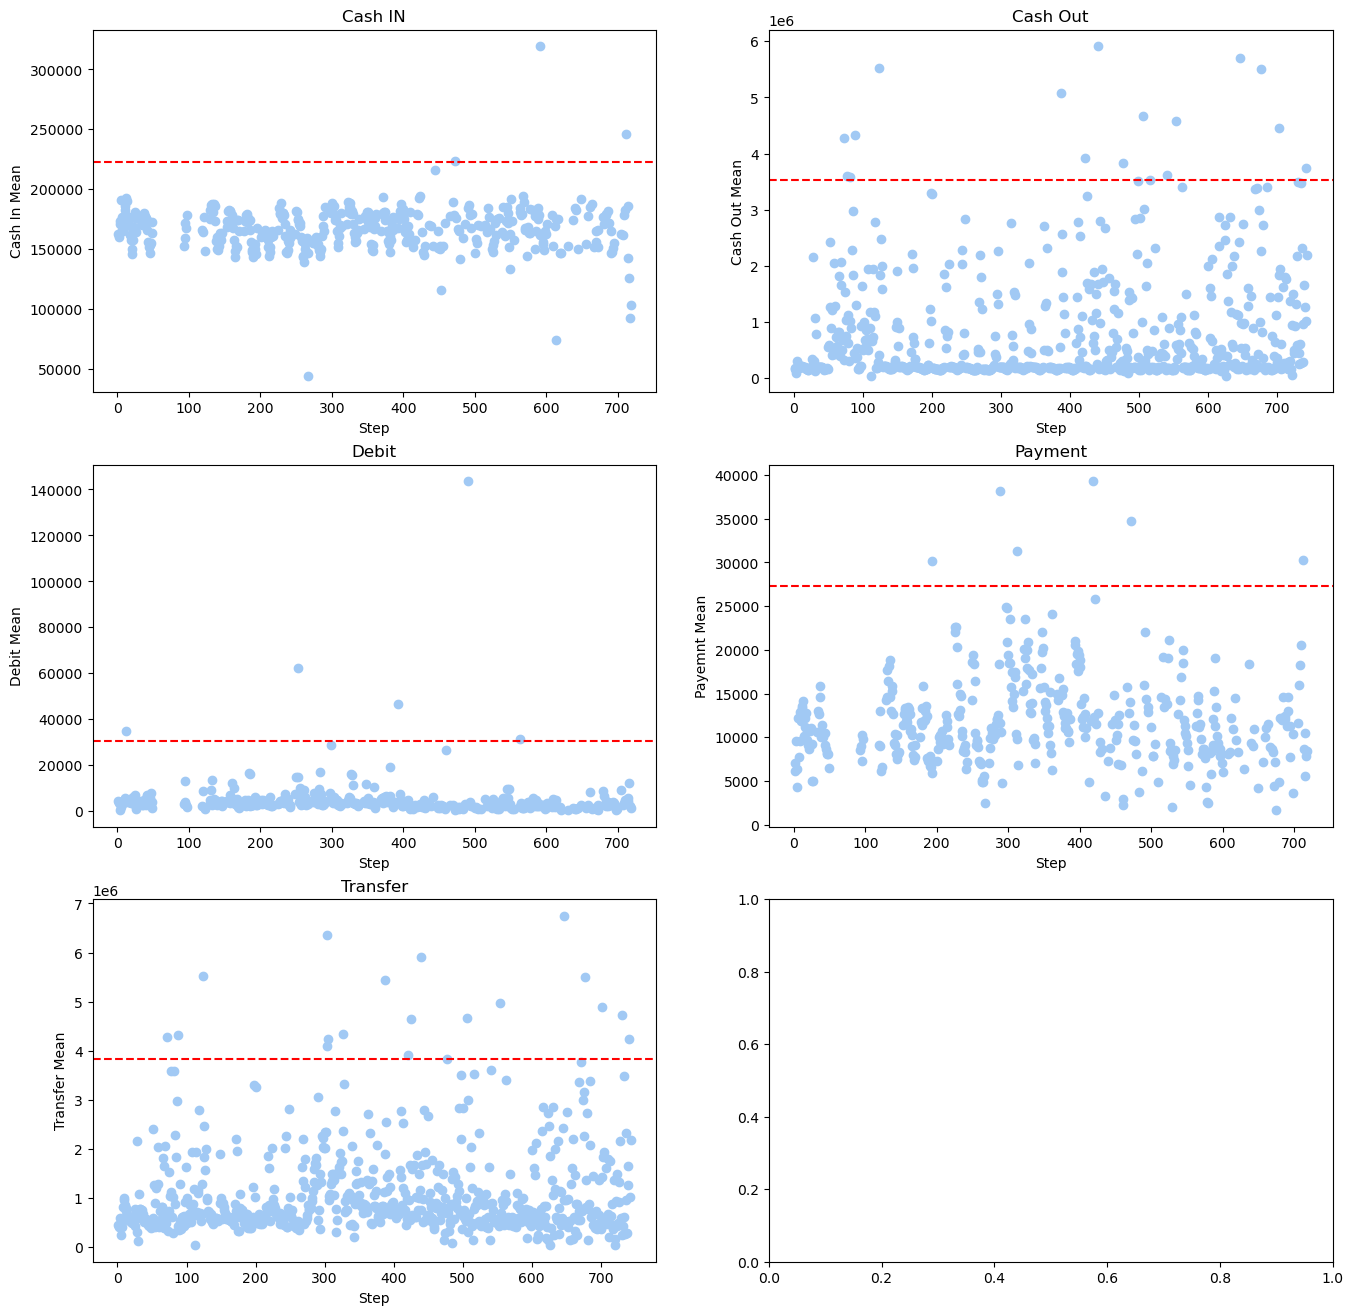

In [10]:
# Outliers

level1 = avg_data[avg_data['type']=='CASH_IN'].amount.mean() + 3*avg_data[avg_data['type']=='CASH_IN'].amount.std()
level2 = avg_data[avg_data['type']=='CASH_OUT'].amount.mean() + 3*avg_data[avg_data['type']=='CASH_OUT'].amount.std()
level3 = avg_data[avg_data['type']=='DEBIT'].amount.mean() + 3*avg_data[avg_data['type']=='DEBIT'].amount.std()
level4 = avg_data[avg_data['type']=='PAYMENT'].amount.mean() + 3*avg_data[avg_data['type']=='PAYMENT'].amount.std()
level5 = avg_data[avg_data['type']=='TRANSFER'].amount.mean() + 3*avg_data[avg_data['type']=='TRANSFER'].amount.std()

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(16,16))

ax[0,0].scatter(x=avg_data[avg_data['type']=='CASH_IN'].step,y=avg_data[avg_data['type']=='CASH_IN'].amount)
ax[0,0].set_xlabel('Step')
ax[0,0].set_ylabel('Cash In Mean')
ax[0,0].set_title('Cash IN')
ax[0,0].axhline(y=level1,color = 'r', linestyle = 'dashed')

ax[0,1].scatter(x=avg_data[avg_data['type']=='CASH_OUT'].step,y=avg_data[avg_data['type']=='CASH_OUT'].amount)
ax[0,1].set_xlabel('Step')
ax[0,1].set_ylabel('Cash Out Mean')
ax[0,1].set_title('Cash Out')
ax[0,1].axhline(y=level2,color = 'r', linestyle = 'dashed')

ax[1,0].scatter(x=avg_data[avg_data['type']=='DEBIT'].step,y=avg_data[avg_data['type']=='DEBIT'].amount)
ax[1,0].set_xlabel('Step')
ax[1,0].set_ylabel('Debit Mean')
ax[1,0].set_title('Debit')
ax[1,0].axhline(y=level3,color = 'r', linestyle = 'dashed')

ax[1,1].scatter(x=avg_data[avg_data['type']=='PAYMENT'].step,y=avg_data[avg_data['type']=='PAYMENT'].amount)
ax[1,1].set_xlabel('Step')
ax[1,1].set_ylabel('Payemnt Mean')
ax[1,1].set_title('Payment')
ax[1,1].axhline(y=level4,color = 'r', linestyle = 'dashed')

ax[2,0].scatter(x=avg_data[avg_data['type']=='TRANSFER'].step,y=avg_data[avg_data['type']=='TRANSFER'].amount)
ax[2,0].set_xlabel('Step')
ax[2,0].set_ylabel('Transfer Mean')
ax[2,0].set_title('Transfer')
ax[2,0].axhline(y=level5,color = 'r', linestyle = 'dashed')

C:\Users\Namdev\AppData\Local\Temp\ipykernel_8240\2812719715.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

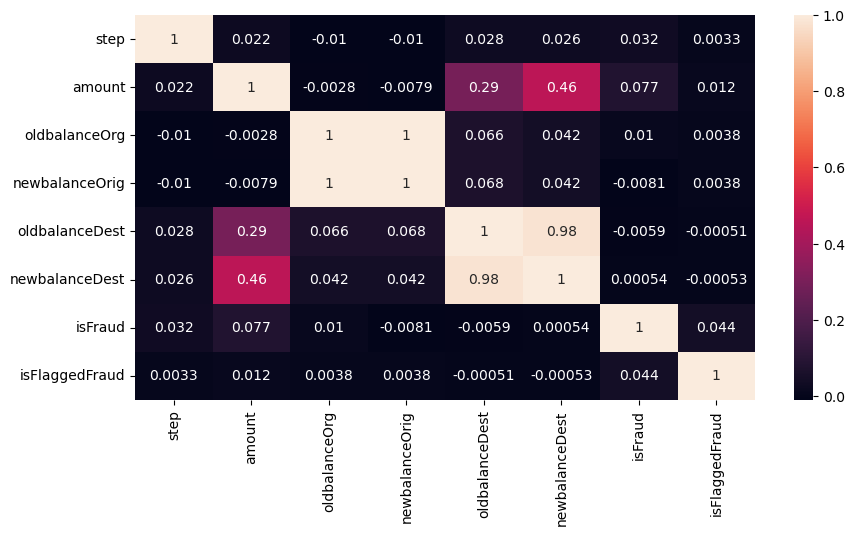

In [11]:
# Correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='type'>

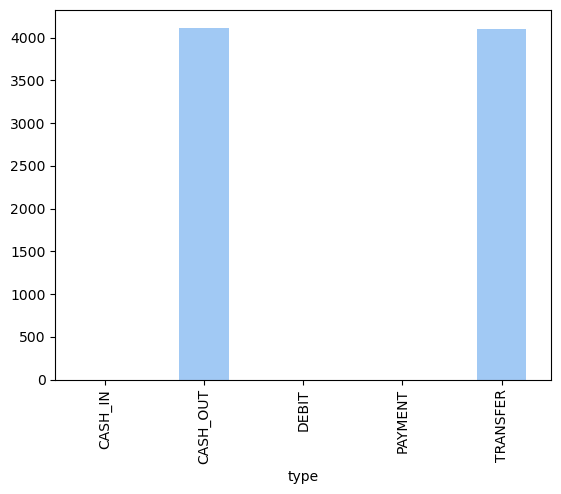

In [12]:
# Frauds based on the types of Transactions

data.groupby('type').isFraud.sum().plot(kind='bar')

<Axes: xlabel='isFraud'>

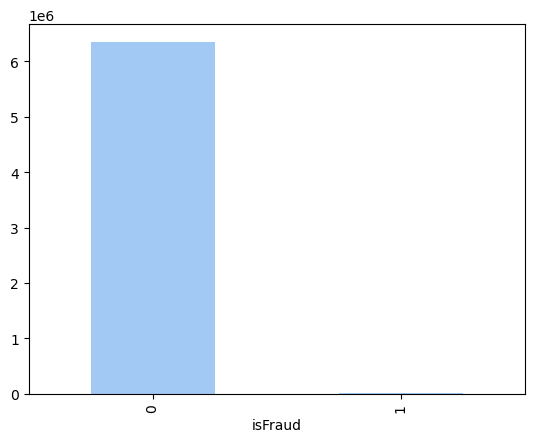

In [13]:
# Most of the Datapoints are Not Fraud
data.groupby('isFraud').step.count().plot(kind='bar')

## Data Preprocessing

In [14]:
data2 = data.copy()

In [15]:
data2['Label'] = data2['isFlaggedFraud'].astype('str') + " " + data2['isFraud'].astype('str')
data2.drop(columns=['isFlaggedFraud','isFraud'],inplace=True)

In [16]:
data2.insert(0, 'BalanceOrig', np.sqrt((data2['oldbalanceOrg']+1) * (data2['newbalanceOrig']+1)))

In [17]:
data2.insert(0, 'BalanceDest', np.sqrt((data2['oldbalanceDest']+1)*(data2['newbalanceDest']+1)))

In [18]:
data2.drop(columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],inplace=True)

In [19]:
types = pd.get_dummies(data2['type'],drop_first=False)
data2 = pd.concat([data2,types],axis=1)

In [20]:
data2.drop(columns='type',inplace=True)

In [21]:
oe = OrdinalEncoder()

In [22]:
oe.fit(np.asarray(data2['nameOrig']).reshape(-1,1))
data2['nameOrig'] = oe.transform(np.asarray(data2['nameOrig']).reshape(-1,1))

In [23]:
oe.fit(np.asarray(data2['nameDest']).reshape(-1,1))
data2['nameDest'] = oe.transform(np.asarray(data2['nameDest']).reshape(-1,1))

In [24]:
data2['nameOrig'].head()

0     757869.0
1    2188998.0
2    1002156.0
3    5828262.0
4    3445981.0
Name: nameOrig, dtype: float64

In [25]:
data2['nameDest'].head()

0    1662094.0
1    1733924.0
2     439685.0
3     391696.0
4     828919.0
Name: nameDest, dtype: float64

In [26]:
# Scaling the Data
scaler = StandardScaler()
data2['nameOrig'] = scaler.fit_transform(np.asarray(data2['nameOrig']).reshape(-1,1))
data2['nameDest'] = scaler.fit_transform(np.asarray(data2['nameDest']).reshape(-1,1))
data2['BalanceDest'] = scaler.fit_transform(np.asarray(data2['BalanceDest']).reshape(-1,1))
data2['BalanceOrig'] = scaler.fit_transform(np.asarray(data2['BalanceOrig']).reshape(-1,1))
data2['amount'] = scaler.fit_transform(np.asarray(data2['amount']).reshape(-1,1))
data2['step'] = scaler.fit_transform(np.asarray(data2['step']).reshape(-1,1))

In [27]:
data2.head()

,BalanceDest,BalanceOrig,step,amount,nameOrig,nameDest,Label,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.325095,-0.230196,-1.703042,-0.281560,-1.318825,1.220490,0 0,0,0,0,1,0
1,-0.325095,-0.280019,-1.703042,-0.294767,-0.538520,1.316232,0 0,0,0,0,1,0
2,-0.325095,-0.286995,-1.703042,-0.297555,-1.185630,-0.408856,0 1,0,0,0,0,1
3,-0.325054,-0.286995,-1.703042,-0.297555,1.445742,-0.472820,0 1,0,1,0,0,0
4,-0.325095,-0.274878,-1.703042,-0.278532,0.146834,0.109953,0 0,0,0,0,1,0


## Model

In [28]:
data2.columns

Index(['BalanceDest', 'BalanceOrig', 'step', 'amount', 'nameOrig', 'nameDest',
       'Label', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype='object')

In [29]:
X = data2[['BalanceDest', 'BalanceOrig', 'step', 'amount', 'nameOrig','nameDest','CASH_OUT','DEBIT','CASH_IN','DEBIT','TRANSFER']]
Y = data2['Label']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split( X_train, Y_train, test_size=0.25, random_state=1)

In [31]:
rfc =  RandomForestClassifier(n_estimators=100, max_depth=5)

In [34]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5)

In [35]:
Y_pred = rfc.predict(X_test)

In [36]:
print(classification_report(Y_test,Y_pred))

c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0 0       1.00      1.00      1.00   1270877
         0 1       1.00      0.22      0.37      1646
         1 1       0.00      0.00      0.00         1

    accuracy                           1.00   1272524
   macro avg       0.67      0.41      0.46   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print('Accuracy :',accuracy_score(Y_test,Y_pred))

Accuracy : 0.9989956967412795


In [38]:
confusion_matrix(Y_test,Y_pred)

array([[1270877,       0,       0],
       [   1277,     369,       0],
       [      1,       0,       0]], dtype=int64)

### Oversampling the Data

In [33]:
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(X_train,Y_train)

In [34]:
rfc.fit(X_resampled,Y_resampled)

RandomForestClassifier(max_depth=5)

In [35]:
Y_pred_resampled = rfc.predict(X_test)

In [36]:
print(classification_report(Y_test,Y_pred_resampled))

              precision    recall  f1-score   support

         0 0       1.00      0.97      0.99   1270877
         0 1       0.04      0.85      0.08      1646
         1 1       0.02      1.00      0.05         1

    accuracy                           0.97   1272524
   macro avg       0.35      0.94      0.37   1272524
weighted avg       1.00      0.97      0.99   1272524



In [37]:
confusion_matrix(Y_test,Y_pred_resampled)

array([[1237557,   33298,      22],
       [    226,    1402,      18],
       [      0,       0,       1]], dtype=int64)

In [38]:
print('Accuracy :',accuracy_score(Y_test,Y_pred_resampled))

Accuracy : 0.9736240731019612
